<span style="color:#87cefa; font-size:200%">Fitting SOLPS datas with existing Function</span> 

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter
from scipy.optimize import curve_fit
from pandas import read_csv
import matplotlib.patches as patches

import Mesh_data
import Mesh_data_server
import seaborn
import fort44_reader as fort
from scipy import stats

al_new_g_sep_out_target_dist = Mesh_data_server.co_sep_out_target_dist
al_newg_newmesh_facing = np.load("./gs_new_g_SAS.npy")

eV = 1.60218e-19

In [ ]:

co_new_mesh = np.load("./new_mesh_co_geo_mesh_center.npy")
co_new_mesh_x = np.load("./new_mesh_co_geo_mesh_x.npy")
co_new_mesh_y = np.load("./new_mesh_co_geo_mesh_y.npy")
co_newmesh_facing = np.load("./gs_new_mesh_co.npy")


al_new_mesh = np.load("./new_mesh_al_geo_mesh_center.npy")
al_new_mesh_x = np.load("./new_mesh_al_geo_mesh_x.npy")
al_new_mesh_y = np.load("./new_mesh_al_geo_mesh_y.npy")
al_newmesh_facing = np.load("./gs_new_mesh_al.npy")

e = 1.60217663*(10**(-19))

charge = []
charge.append(0)
charge.append(e*1)
charge.append(0)
charge.append(e*1)
charge.append(e*2)
charge.append(e*3)
charge.append(e*4)
charge.append(e*5)
charge.append(e*6)
charge.append(0)
charge.append(e*1)
charge.append(e*2)
charge.append(e*3)
charge.append(e*4)
charge.append(e*5)
charge.append(e*6)
charge.append(e*7)
charge.append(e*8)
charge.append(e*9)
charge.append(e*10)


In [ ]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from colorspacious import cspace_converter

# cmaps = {}

# gradient = np.linspace(0, 1, 256)
# gradient = np.vstack((gradient, gradient))


# def plot_color_gradients(category, cmap_list):
#     # Create figure and adjust figure height to number of colormaps
#     nrows = len(cmap_list)
#     figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
#     fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
#     fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
#                         left=0.2, right=0.99)
#     axs[0].set_title(f'{category} colormaps', fontsize=14)

#     for ax, name in zip(axs, cmap_list):
#         ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
#         ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=12,
#                 transform=ax.transAxes)

#     # Turn off *all* ticks & spines, not just the ones with colormaps.
#     for ax in axs:
#         ax.set_axis_off()

#     # Save colormap list for later.
#     cmaps[category] = cmap_list

<span style="color:#87cefa; font-size:150%">Geometry Functions and Variables</span> 

In [ ]:
ny = 36
nx = 96
co_mesh = np.load("./conv_geo_mesh_center.npy")
co_mesh_x = np.load("./conv_geo_mesh_x.npy")
co_mesh_y = np.load("./conv_geo_mesh_y.npy")

al_mesh = np.load("./al_geo_mesh_center.npy")
al_mesh_x = np.load("./al_geo_mesh_x.npy")
al_mesh_y = np.load("./al_geo_mesh_y.npy")

co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")


co_new_mesh = np.load("./new_mesh_co_geo_mesh_center.npy")
co_new_mesh_x = np.load("./new_mesh_co_geo_mesh_x.npy")
co_new_mesh_y = np.load("./new_mesh_co_geo_mesh_y.npy")
co_newmesh_facing = np.load("./gs_new_mesh_co.npy")


al_new_mesh = np.load("./new_mesh_al_geo_mesh_center.npy")
al_new_mesh_x = np.load("./new_mesh_al_geo_mesh_x.npy")
al_new_mesh_y = np.load("./new_mesh_al_geo_mesh_y.npy")
al_newmesh_facing = np.load("./gs_new_mesh_al.npy")


newSAS_mesh = np.load("./new_SAS_geo_mesh_center.npy")
newSAS_mesh_x = np.load("./new_SAS_geo_mesh_y.npy")
newSAS_mesh_y = np.load("./new_SAS_geo_mesh_y.npy")
newSAS_facing = np.load("./gs_new_SAS.npy")

al_new_g_mesh = np.load("ng_geo_mesh_center.npy")
al_new_g_mesh_x = np.load("ng_geo_mesh_x.npy")
al_new_g_mesh_y = np.load("ng_geo_mesh_y.npy")

al_new_g_facing = np.load("./gs_new_g_SAS.npy")




print(np.shape(co_facing))
print(np.shape(al_facing))
def co_distance_center(first_point, second_point):
    x_range = x_co_meshinfo[first_point[1],first_point[0]]-x_co_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_meshinfo[first_point[1],first_point[0]]-y_co_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def co_distance_point(first_point, second_point):
    x_range = co_mesh_x[first_point[2],first_point[1],first_point[0]]-co_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_mesh_y[first_point[2],first_point[1],first_point[0]]-co_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_al_meshinfo[first_point[1],first_point[0]]-x_al_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_meshinfo[first_point[1],first_point[0]]-y_al_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = al_mesh_x[first_point[2],first_point[1],first_point[0]]-al_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_mesh_y[first_point[2],first_point[1],first_point[0]]-al_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

#new geo files
def co_new_mesh_distance_center(first_point, second_point):
    x_range = x_co_new_meshinfo[first_point[1],first_point[0]]-x_co_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_new_meshinfo[first_point[1],first_point[0]]-y_co_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result
def co_new_mesh_distance_point(first_point, second_point):
    x_range = co_new_mesh_x[first_point[2],first_point[1],first_point[0]]-co_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_new_mesh_y[first_point[2],first_point[1],first_point[0]]-co_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def al_new_mesh_distance_center(first_point, second_point):
    x_range = x_al_new_meshinfo[first_point[1],first_point[0]]-x_al_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_new_meshinfo[first_point[1],first_point[0]]-y_al_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_new_mesh_distance_point(first_point, second_point):
    x_range = al_new_mesh_x[first_point[2],first_point[1],first_point[0]]-al_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_new_mesh_y[first_point[2],first_point[1],first_point[0]]-al_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def newSAS_distance_center(first_point, second_point):
    x_range = x_newSAS_meshinfo[first_point[1],first_point[0]]-x_newSAS_meshinfo[second_point[1],second_point[0]]
    y_range = y_newSAS_meshinfo[first_point[1],first_point[0]]-y_newSAS_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def newSAS_distance_point(first_point, second_point):
    x_range = newSAS_mesh_x[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = newSAS_mesh_y[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result




def neutral_pressure(na,ti):
    pr = na[0,:,:]*ti[:,:]+ na[0,:,:]*ti[:,:]+ na[2,:,:]*ti[:,:]+na[2,:,:]*ti[:,:]+na[9,:,:]*ti[:,:]
    return pr
    
dumx_co_meshinfo = co_mesh[:,0]
dumy_co_meshinfo = co_mesh[:,1]
x_co_meshinfo = dumx_co_meshinfo.reshape(ny+2,nx+2)
y_co_meshinfo = dumy_co_meshinfo.reshape(ny+2,nx+2)

dumx_al_meshinfo = al_mesh[:,0]
dumy_al_meshinfo = al_mesh[:,1]
x_al_meshinfo = dumx_al_meshinfo.reshape(ny+2,nx+2)
y_al_meshinfo = dumy_al_meshinfo.reshape(ny+2,nx+2)

dumx_co_new_meshinfo = co_new_mesh[:,0]
dumy_co_new_meshinfo = co_new_mesh[:,1]
x_co_new_meshinfo = dumx_co_new_meshinfo.reshape(ny+2,nx+2)
y_co_new_meshinfo = dumy_co_new_meshinfo.reshape(ny+2,nx+2)

dumx_al_new_meshinfo = al_new_mesh[:,0]
dumy_al_new_meshinfo = al_new_mesh[:,1]
x_al_new_meshinfo = dumx_al_new_meshinfo.reshape(ny+2,nx+2)
y_al_new_meshinfo = dumy_al_new_meshinfo.reshape(ny+2,nx+2)

dumx_newSAS_meshinfo = newSAS_mesh[:,0]
dumy_newSAS_meshinfo = newSAS_mesh[:,1]
x_newSAS_meshinfo = dumx_newSAS_meshinfo.reshape(ny+2,nx+2)
y_newSAS_meshinfo = dumy_newSAS_meshinfo.reshape(ny+2,nx+2)


#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)
co_sep_out_target = np.zeros(2)
co_sep_out_target[0] = co_mesh_x[1,18,96]
co_sep_out_target[1] = co_mesh_y[1,18,96]
co_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = al_mesh_x[1,18,96]
al_sep_out_target[1] = al_mesh_y[1,18,96]
al_mesh_x_cen = np.sum(al_mesh_x, axis = 0)/4
al_mesh_y_cen = np.sum(al_mesh_y, axis = 0)/4

co_new_mesh_sep_out_target = np.zeros(2)
co_new_mesh_sep_out_target[0] = co_mesh_x[1,18,96]
co_new_mesh_sep_out_target[1] = co_mesh_y[1,18,96]
co_new_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_new_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_new_mesh_sep_out_target = np.zeros(2)
al_new_mesh_sep_out_target[0] = al_new_mesh_x[1,18,96]
al_new_mesh_sep_out_target[1] = al_new_mesh_y[1,18,96]
al_new_mesh_x_cen = np.sum(al_new_mesh_x, axis = 0)/4
al_new_mesh_y_cen = np.sum(al_new_mesh_y, axis = 0)/4

newSAS_sep_out_target = np.zeros(2)
newSAS_sep_out_target[0] = newSAS_mesh_x[1,18,96]
newSAS_sep_out_target[1] = newSAS_mesh_y[1,18,96]
newSAS_mesh_x_cen = np.sum(newSAS_mesh_x, axis = 0)/4
newSAS_mesh_y_cen = np.sum(newSAS_mesh_y, axis = 0)/4



X_point = []



co_sep_out_target_dist = np.zeros(ny+2)
co_sep_in_target_dist = np.zeros(ny+2)     
co_sep_out_midplane_dist = np.zeros(ny+2)
co_sep_in_midplane_dist = np.zeros(ny+2)

co_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_out_target_dist = np.zeros(ny+2)
co_new_mesh_sep_in_target_dist = np.zeros(ny+2)

al_sep_out_midplane_dist = np.zeros(ny+2)
al_sep_in_midplane_dist = np.zeros(ny+2)
al_sep_out_target_dist = np.zeros(ny+2)
al_sep_in_target_dist = np.zeros(ny+2)


al_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_out_target_dist = np.zeros(ny+2)
al_new_mesh_sep_in_target_dist = np.zeros(ny+2)

newSAS_sep_out_midplane_dist = np.zeros(ny+2)
newSAS_sep_in_midplane_dist = np.zeros(ny+2)
newSAS_sep_out_target_dist = np.zeros(ny+2)
newSAS_sep_in_target_dist = np.zeros(ny+2)



conv_Xpt_dist = np.zeros(20)
al_Xpt_dist = np.zeros(20)






for i in range(ny+2):
    co_sep_out_midplane_dist[i] = co_distance_point([52,i,1],[52,18,1])
    co_sep_in_midplane_dist[i]  = co_distance_point([29,i,1],[29,18,1])
    co_sep_out_target_dist[i] = co_distance_point([96,i,1],[96,18,1])
    co_sep_in_target_dist[i] = co_distance_point([1,i,1],[1,18,1])


    co_new_mesh_sep_out_midplane_dist[i] = co_new_mesh_distance_point([52,i,1],[52,18,1])
    co_new_mesh_sep_in_midplane_dist[i]  = co_new_mesh_distance_point([29,i,1],[29,18,1])
    co_new_mesh_sep_out_target_dist[i] = co_new_mesh_distance_point([96,i,1],[96,18,1])
    co_new_mesh_sep_in_target_dist[i]  = co_new_mesh_distance_point([1,i,1],[1,18,1])

    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    al_sep_in_midplane_dist[i]  = al_distance_point([29,i,1],[29,18,1])
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    al_sep_in_target_dist[i]  = al_distance_point([1,i,1],[1,18,1])


    al_new_mesh_sep_out_midplane_dist[i] = al_new_mesh_distance_point([52,i,1],[52,18,1])
    al_new_mesh_sep_in_midplane_dist[i]  = al_new_mesh_distance_point([29,i,1],[29,18,1])
    al_new_mesh_sep_out_target_dist[i] = al_new_mesh_distance_point([96,i,1],[96,18,1])
    al_new_mesh_sep_in_target_dist[i]  = al_new_mesh_distance_point([1,i,1],[1,18,1])
    

#    newSAS_sep_out_midplane_dist[i] = newSAS_distance_point([52,i,1],[52,18,1])
#    newSAS_sep_in_midplane_dist[i]  = newSAS_distance_point([29,i,1],[29,18,1])
#    newSAS_sep_out_target_dist[i] = newSAS_distance_point([96,i,1],[96,18,1])
#    newSAS_sep_in_target_dist[i]  = newSAS_distance_point([1,i,1],[1,18,1])
    
    if i<18:
        co_sep_out_midplane_dist[i] = -co_sep_out_midplane_dist[i]
        co_sep_in_midplane_dist[i]  = -co_sep_in_midplane_dist[i]
        co_sep_out_target_dist[i] = -co_sep_out_target_dist[i]
        co_sep_in_target_dist[i] = -co_sep_in_target_dist[i]

        co_new_mesh_sep_out_midplane_dist[i] = -co_new_mesh_sep_out_midplane_dist[i]
        co_new_mesh_sep_in_midplane_dist[i]  = -co_new_mesh_sep_in_midplane_dist[i]
        co_new_mesh_sep_out_target_dist[i] = -co_new_mesh_sep_out_target_dist[i]
        co_new_mesh_sep_in_target_dist[i] = -co_new_mesh_sep_in_target_dist[i]

        
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]
        
        al_new_mesh_sep_out_midplane_dist[i] = -al_new_mesh_sep_out_midplane_dist[i]
        al_new_mesh_sep_in_midplane_dist[i] = -al_new_mesh_sep_in_midplane_dist[i]
        al_new_mesh_sep_out_target_dist[i] = -al_new_mesh_sep_out_target_dist[i]
        al_new_mesh_sep_in_target_dist[i] = -al_new_mesh_sep_in_target_dist[i]

        
newSAS_sep_out_midplane_dist = Mesh_data.newSAS_sep_out_midplane_dist
newSAS_sep_in_midplane_dist = Mesh_data.newSAS_sep_in_midplane_dist
newSAS_sep_out_target_dist = Mesh_data.newSAS_sep_out_target_dist
newSAS_sep_in_target_dist = Mesh_data.newSAS_sep_in_target_dist
        




    
for i in range(20):
    conv_Xpt_dist[i] = co_distance_center([78,18],[78+i,18])

    
    
for i in range(20):
    al_Xpt_dist[i] = al_distance_center([78,18],[78+i,18])
print(conv_Xpt_dist)
print(al_Xpt_dist)


# def total_pressure(ne,te,na,ti):
#     pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)
#     return pr


def total_neutral_pressure(ne,te,na,ti,ua):
    pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)+ne[:,:]*te[:,:] + na[1,:,:]*ua[1,:,:]*ua[1,:,:] +np.sum(na[2:9,:,:]*ua[2:9,:,:]*ua[2:9,:,:],axis = 0)+np.sum(na[9:,:,:]*ua[9:,:,:]*ua[9:,:,:],axis = 0)
    return pr


def total_pressure(ne,te,na,ti,ua):

    mass_indes = np.array([3.3435837724*10**(-27),3.3435837724*10**(-27),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26)])
#    mass_indes = np.transpose(mass_indes)
    pr = ne[:,:]*te[:,:] 
    impor = na[:,:,:]*ua[:,:,:]*ua[:,:,:]
    for i in range(np.shape(mass_indes)[0]):
        pr= pr+impor[i,:,:]*mass_indes[i]+na[i,:,:]*ti[:,:]
    return pr


In [ ]:
fht_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_8MW_noNe_re.npy")
fht_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_16MW_Ne_0.npy")
fht_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_32MW_Ne_0_re.npy")
fht_b2fplasmf_al_8MW_Ne_3e19 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_8MW_Ne_3e19_re.npy")
rsana_b2fplasmf_Ex_SAS_8MW_Ne_0=np.load("./data_Heating_Geo_sput/rsana_b2fplasmf_Ex_SAS_8MW_Ne_0.npy")
rsana_b2fplasmf_SAS_8MW_Ne_0= np.load("./data_Heating_Geo_sput/rsana_b2fplasmf_SAS_8MW_Ne_0.npy")
rsana_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/rsana_b2fplasmf_co_8MW_Ne_0.npy")

In [ ]:
np.shape(rsana_b2fplasmf_SAS_8MW_Ne_0)

In [ ]:
mass_indes = np.array([3.3435837724*10**(-27),3.3435837724*10**(-27),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26)])

for i in range(np.shape(mass_indes)[0]):
    print(i)
    
print(np.sqrt(2))

In [ ]:
ne_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_SAS_8MW_noNe_re.npy")
ne_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_SAS_16MW_Ne_0.npy")
ne_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_SAS_32MW_Ne_0_re.npy")
ne_b2fplasmf_al_8MW_Ne_3e19 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_SAS_8MW_Ne_3e19_re.npy")

te_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS_8MW_noNe_re.npy")
te_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS_16MW_Ne_0.npy")
te_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS_32MW_Ne_0_re.npy")
te_b2fplasmf_al_8MW_Ne_3e19 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS_8MW_Ne_3e19_re.npy")

na_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_SAS_8MW_noNe_re.npy")
na_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_SAS_16MW_Ne_0.npy")
na_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_SAS_32MW_Ne_0_re.npy")
na_b2fplasmf_al_8MW_Ne_3e19 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_SAS_8MW_Ne_3e19_re.npy")

ti_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/ti_b2fplasmf_SAS_8MW_noNe_re.npy")
ti_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/ti_b2fplasmf_SAS_16MW_Ne_0.npy")
ti_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/ti_b2fplasmf_SAS_32MW_Ne_0_re.npy")
ti_b2fplasmf_al_8MW_Ne_3e19 = np.load("./data_Heating_Geo_sput/ti_b2fplasmf_SAS_8MW_Ne_3e19_re.npy")

ua_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/ua_b2fplasmf_SAS_8MW_noNe_re.npy")
ua_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/ua_b2fplasmf_SAS_16MW_Ne_0.npy")
ua_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/ua_b2fplasmf_SAS_32MW_Ne_0_re.npy")
ua_b2fplasmf_al_8MW_Ne_3e19 = np.load("./data_Heating_Geo_sput/ua_b2fplasmf_SAS_8MW_Ne_3e19_re.npy")

In [ ]:
# te_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_8MW_Ne_0.npy")
# na_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_8MW_Ne_0.npy")
# ti_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/ti_b2fplasmf_co_8MW_Ne_0.npy")
# ua_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/ua_b2fplasmf_co_8MW_Ne_0.npy")


ne_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/ne_b2fplasmf_co_8MW_Ne_0.npy")
te_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_8MW_Ne_0.npy")
na_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_8MW_Ne_0.npy")
ti_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/ti_b2fplasmf_co_8MW_Ne_0.npy")
ua_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/ua_b2fplasmf_co_8MW_Ne_0.npy")

ne_b2fplasmf_co_16MW_Ne_0=np.load("./data_Heating_Geo_sput/ne_b2fplasmf_co_16MW_Ne_0.npy")
te_b2fplasmf_co_16MW_Ne_0=np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_16MW_Ne_0.npy")
na_b2fplasmf_co_16MW_Ne_0=np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_16MW_Ne_0.npy")
ti_b2fplasmf_co_16MW_Ne_0=np.load("./data_Heating_Geo_sput/ti_b2fplasmf_co_16MW_Ne_0.npy")
ua_b2fplasmf_co_16MW_Ne_0=np.load("./data_Heating_Geo_sput/ua_b2fplasmf_co_16MW_Ne_0.npy")

ne_b2fplasmf_co_24MW_Ne_0=np.load("./data_Heating_Geo_sput/ne_b2fplasmf_co_24MW_Ne_0.npy")
te_b2fplasmf_co_24MW_Ne_0=np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_24MW_Ne_0.npy")
na_b2fplasmf_co_24MW_Ne_0=np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_24MW_Ne_0.npy")
ti_b2fplasmf_co_24MW_Ne_0=np.load("./data_Heating_Geo_sput/ti_b2fplasmf_co_24MW_Ne_0.npy")
ua_b2fplasmf_co_24MW_Ne_0=np.load("./data_Heating_Geo_sput/ua_b2fplasmf_co_24MW_Ne_0.npy")

ne_b2fplasmf_co_28MW_Ne_0=np.load("./data_Heating_Geo_sput/ne_b2fplasmf_co_28MW_Ne_0.npy")
te_b2fplasmf_co_28MW_Ne_0=np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_28MW_Ne_0.npy")
na_b2fplasmf_co_28MW_Ne_0=np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_28MW_Ne_0.npy")
ti_b2fplasmf_co_28MW_Ne_0=np.load("./data_Heating_Geo_sput/ti_b2fplasmf_co_28MW_Ne_0.npy")
ua_b2fplasmf_co_28MW_Ne_0=np.load("./data_Heating_Geo_sput/ua_b2fplasmf_co_28MW_Ne_0.npy")

ne_b2fplasmf_co_32MW_Ne_0=np.load("./data_Heating_Geo_sput/ne_b2fplasmf_co_32MW_Ne_0.npy")
te_b2fplasmf_co_32MW_Ne_0=np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_32MW_Ne_0.npy")
na_b2fplasmf_co_32MW_Ne_0=np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_32MW_Ne_0.npy")
ti_b2fplasmf_co_32MW_Ne_0=np.load("./data_Heating_Geo_sput/ti_b2fplasmf_co_32MW_Ne_0.npy")
ua_b2fplasmf_co_32MW_Ne_0=np.load("./data_Heating_Geo_sput/ua_b2fplasmf_co_32MW_Ne_0.npy")



In [ ]:
J_al_8MW = np.zeros([20, 2, 38, 98])

geo_1e18 = ((np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_1e18_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_1e18_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_SAS.npy")[1:,96])
fna_al_8MW = np.load("./data_Heating_Geo_sput/fna_b2fplasmf_SAS_8MW_noNe_re.npy")


for i in range(20):
    J_al_8MW[i,:,:,:] = fna_al_8MW[i,:,:,:]#*charge[i] 

J_al_8MW = np.sum(J_al_8MW,axis=0)
target_SAS_8MW = []
np.shape(geo_1e18)
target_SAS_8MW.append((J_al_8MW[0,19:,96])*geo_1e18[18:]/(al_newmesh_facing[0,19:,96]*10000))


In [ ]:
def Temp_fit(x, A,T, n):
	return A*(1- np.exp(-x*(T**(-1))))**n

def Flux_fit(x, A,T, n):
	return A*((1- np.exp(-x*(T**(-1))))**n)*(x**(-0.5))



def Temp_fit_2(x, T, n):
	return (1- np.exp(-x*(T**(-1))))**n



def total_pressure(ne,te,na,ti,ua):

    mass_indes = np.array([3.3435837724*10**(-27),3.3435837724*10**(-27),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26)])
#    mass_indes = np.transpose(mass_indes)
    pr = ne[:,:]*te[:,:] 
    impor = na[:,:,:]*ua[:,:,:]*ua[:,:,:]
    for i in range(np.shape(mass_indes)[0]):
        pr= pr+impor[i,:,:]*mass_indes[i]+na[i,:,:]*ti[:,:]
    return pr


In [ ]:
vol_b2fplasmf_SAS_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/vol_b2fplasmf_SAS_8MW_Ne_0.npy")
print(np.shape(vol_b2fplasmf_SAS_8MW_Ne_0))

In [ ]:
font1 = {'family': 'Times New Roman',
      'color':  'black',
      'weight': 'normal',
      'size': 14}
font2= {'family': 'Times New Roman',
      'color':  'black',
      'weight': 'normal',
      'size': 12}


v_aD0 = np.sqrt(ti_b2fplasmf_al_8MW_Ne_0[:,:]/mass_indes[0])/rsana_b2fplasmf_SAS_8MW_Ne_0[0,:,:]
v_aC0 = np.sqrt(ti_b2fplasmf_al_8MW_Ne_0[:,:]/mass_indes[2])/rsana_b2fplasmf_SAS_8MW_Ne_0[2,:,:]
v_aNe0 = np.sqrt(ti_b2fplasmf_al_8MW_Ne_0[:,:]/mass_indes[9])/rsana_b2fplasmf_SAS_8MW_Ne_0[9,:,:]

print(v_aD0[20,56]*1000)
print(v_aC0[20,56]*1000)
print(v_aNe0[20,56]*1000)




print("  ")
v_aD0 = np.sqrt(ti_b2fplasmf_co_8MW_Ne_0[:,:]/mass_indes[0])/rsana_b2fplasmf_co_8MW_Ne_0[0,:,:]
v_aC0 = np.sqrt(ti_b2fplasmf_co_8MW_Ne_0[:,:]/mass_indes[2])/rsana_b2fplasmf_co_8MW_Ne_0[2,:,:]
v_aNe0 = np.sqrt(ti_b2fplasmf_co_8MW_Ne_0[:,:]/mass_indes[9])/rsana_b2fplasmf_co_8MW_Ne_0[9,:,:]

print(v_aD0[20,56]*1000)
print(v_aC0[20,56]*1000)
print(v_aNe0[20,56]*1000)

def ioni_pene_dist(ti,rsana,ne,vol):
      D0= np.sqrt(ti[:,:]/mass_indes[0])/(ne[:,:]*vol[:,:]*rsana[0,:,:])
      C0= np.sqrt(ti[:,:]/mass_indes[2])/(ne[:,:]*vol[:,:]*rsana[2,:,:])
      Ne0= np.sqrt(ti[:,:]/mass_indes[9])/(ne[:,:]*vol[:,:]*rsana[9,:,:])
      return [D0,C0,Ne0]

print("")
print("re", (ioni_pene_dist(ti_b2fplasmf_al_8MW_Ne_0,rsana_b2fplasmf_SAS_8MW_Ne_0,ne_b2fplasmf_al_8MW_Ne_0,vol_b2fplasmf_SAS_8MW_Ne_0)[0])[20,56])

print(al_sep_out_midplane_dist[18:]*1000)
print(co_sep_out_midplane_dist[18:]*1000)



In [ ]:
te_b2fplasmf_al_8MW_Ne_0[20,56:]/eV

In [ ]:
rsana_b2fplasmf_SAS_8MW_Ne_0


In [ ]:
print((np.sqrt(ti_b2fplasmf_co_8MW_Ne_0[:,:]/mass_indes[0])/(ne_b2fplasmf_al_8MW_Ne_0[:,:]*(10**(-13))))[20,53:])


In [ ]:
#print(np.sqrt(ti_b2fplasmf_co_8MW_Ne_0[:,:]/mass_indes[0])/(ne_b2fplasmf_al_8MW_Ne_0[:,:]*(10**(-14))))[20,53:]
#print(np.shape(np.sqrt(ti_b2fplasmf_co_8MW_Ne_0[:,:]/mass_indes[0])/(ne_b2fplasmf_al_8MW_Ne_0[:,:]*(10**(-14))))[20,53:])


In [ ]:
#ne[:,:]*vol[:,:]

In [ ]:
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 0.01)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()
print(type(x))

In [ ]:
loss_al = []
loss_co = []

loss_al_8MW = []
loss_co_8MW = []

loss_al_32MW = []
loss_co_32MW = []

target_temp_al_8MW = []
target_temp_co_8MW = []

target_temp_al_32MW = []
target_temp_co_32MW = []


target_temp_al = []
target_temp_co = []



#total_pressure(ne,te,na,ti,ua)

al_mom_loss_8MW = total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)[18,96]/total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)[18,53]
al_mom_loss_16MW = total_pressure(ne_b2fplasmf_al_16MW_Ne_0,te_b2fplasmf_al_16MW_Ne_0,na_b2fplasmf_al_16MW_Ne_0,ti_b2fplasmf_al_16MW_Ne_0,ua_b2fplasmf_al_16MW_Ne_0)[18,96]/total_pressure(ne_b2fplasmf_al_16MW_Ne_0,te_b2fplasmf_al_16MW_Ne_0,na_b2fplasmf_al_16MW_Ne_0,ti_b2fplasmf_al_16MW_Ne_0,ua_b2fplasmf_al_16MW_Ne_0)[18,53]
al_mon_loss_32MW = total_pressure(ne_b2fplasmf_al_32MW_Ne_0,te_b2fplasmf_al_32MW_Ne_0,na_b2fplasmf_al_32MW_Ne_0,ti_b2fplasmf_al_32MW_Ne_0,ua_b2fplasmf_al_32MW_Ne_0)[18,96]/total_pressure(ne_b2fplasmf_al_32MW_Ne_0,te_b2fplasmf_al_32MW_Ne_0,na_b2fplasmf_al_32MW_Ne_0,ti_b2fplasmf_al_32MW_Ne_0,ua_b2fplasmf_al_32MW_Ne_0)[18,53]
loss_al.append(al_mom_loss_8MW)
loss_al.append(al_mom_loss_16MW)
loss_al.append(al_mon_loss_32MW)

# for i_al in range(20,30):
#     loss_al_8MW.append(total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)[i_al,53])
#     target_temp_al_8MW.append(te_b2fplasmf_al_8MW_Ne_0[i_al,96]/eV)

#     loss_al_32MW.append(total_pressure(ne_b2fplasmf_al_32MW_Ne_0,te_b2fplasmf_al_32MW_Ne_0,na_b2fplasmf_al_32MW_Ne_0,ti_b2fplasmf_al_32MW_Ne_0,ua_b2fplasmf_al_32MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_al_32MW_Ne_0,te_b2fplasmf_al_32MW_Ne_0,na_b2fplasmf_al_32MW_Ne_0,ti_b2fplasmf_al_32MW_Ne_0,ua_b2fplasmf_al_32MW_Ne_0)[i_al,53])
#     target_temp_al_32MW.append(te_b2fplasmf_al_32MW_Ne_0[i_al,96]/eV)


# for i_al in range(30,38):
#     loss_co_8MW.append(total_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)[i_al,53])
#     target_temp_co_8MW.append(te_b2fplasmf_co_8MW_Ne_0[i_al,96]/eV)

#     loss_co_32MW.append(total_pressure(ne_b2fplasmf_co_32MW_Ne_0,te_b2fplasmf_co_32MW_Ne_0,na_b2fplasmf_co_32MW_Ne_0,ti_b2fplasmf_co_32MW_Ne_0,ua_b2fplasmf_co_32MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_co_32MW_Ne_0,te_b2fplasmf_co_32MW_Ne_0,na_b2fplasmf_co_32MW_Ne_0,ti_b2fplasmf_co_32MW_Ne_0,ua_b2fplasmf_co_32MW_Ne_0)[i_al,53])
#     target_temp_co_32MW.append(te_b2fplasmf_co_32MW_Ne_0[i_al,96]/eV)

target_temp_al.append(te_b2fplasmf_al_8MW_Ne_0[18,97])
target_temp_al.append(te_b2fplasmf_al_16MW_Ne_0[18,97])
target_temp_al.append(te_b2fplasmf_al_32MW_Ne_0[18,97])
#target_temp_al.append[te_b2fplasmf_al_8MW_Ne_3e19[18,96]]


co_mom_loss_8MW  = total_pressure(ne_b2fplasmf_co_8MW_Ne_0 ,te_b2fplasmf_co_8MW_Ne_0 ,na_b2fplasmf_co_8MW_Ne_0 ,ti_b2fplasmf_co_8MW_Ne_0 ,ua_b2fplasmf_co_8MW_Ne_0)[18,96]/total_pressure( ne_b2fplasmf_co_8MW_Ne_0 ,te_b2fplasmf_co_8MW_Ne_0 ,na_b2fplasmf_co_8MW_Ne_0 ,ti_b2fplasmf_co_8MW_Ne_0 ,ua_b2fplasmf_co_8MW_Ne_0)[18,53]
co_mom_loss_16MW = total_pressure(ne_b2fplasmf_co_16MW_Ne_0,te_b2fplasmf_co_16MW_Ne_0,na_b2fplasmf_co_16MW_Ne_0,ti_b2fplasmf_co_16MW_Ne_0,ua_b2fplasmf_co_16MW_Ne_0)[18,96]/total_pressure(ne_b2fplasmf_co_16MW_Ne_0,te_b2fplasmf_co_16MW_Ne_0,na_b2fplasmf_co_16MW_Ne_0,ti_b2fplasmf_co_16MW_Ne_0,ua_b2fplasmf_co_16MW_Ne_0)[18,53]
co_mon_loss_32MW = total_pressure(ne_b2fplasmf_co_32MW_Ne_0,te_b2fplasmf_co_32MW_Ne_0,na_b2fplasmf_co_32MW_Ne_0,ti_b2fplasmf_co_32MW_Ne_0,ua_b2fplasmf_co_32MW_Ne_0)[18,96]/total_pressure(ne_b2fplasmf_co_32MW_Ne_0,te_b2fplasmf_co_32MW_Ne_0,na_b2fplasmf_co_32MW_Ne_0,ti_b2fplasmf_co_32MW_Ne_0,ua_b2fplasmf_co_32MW_Ne_0)[18,53]
loss_co.append(co_mom_loss_8MW)
loss_co.append(co_mom_loss_16MW)
loss_co.append(co_mon_loss_32MW)


target_temp_co.append(te_b2fplasmf_co_8MW_Ne_0[18,97])
target_temp_co.append(te_b2fplasmf_co_16MW_Ne_0[18,97])
target_temp_co.append(te_b2fplasmf_co_32MW_Ne_0[18,97])


In [ ]:
for i_al in range(25,32):
    loss_al_8MW.append(total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)[i_al,53])
    target_temp_al_8MW.append(te_b2fplasmf_al_8MW_Ne_0[i_al,96]/eV)

#x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]
x_al_8MW= np.array(target_temp_al_8MW)
y_al_8MW=np.array(loss_al_8MW)
#for i in range(len(x_al_8MW)):
#    x_al_8MW[i] = x_al_8MW[i]/eV

# curve fit
popt, _ = curve_fit(Temp_fit, x_al_8MW, y_al_8MW)

A_a8,T_a8,n_a8 = popt

x_line_al_8MW = np.arange(0.1,10, step=0.01)
# calculate the output for the range
y_line_al_8MW = Temp_fit(x_line_al_8MW, A_a8,T_a8, n_a8)

residuals = y_al_8MW-Temp_fit(x_al_8MW, A_a8,T_a8,n_a8)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_al_8MW-np.mean(y_al_8MW))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.figure(figsize=(6, 5),dpi = 150)

plt.plot(x_line_al_8MW, y_line_al_8MW, '--', color='blue', lw  = 1)
plt.title(r"$T_{et}$ fitting - SAS divertor")
plt.scatter(x_al_8MW,y_al_8MW)
plt.axhline(y=A_a8,xmin=0.1,xmax=1,linestyle=':', c = 'black')
plt.text(0.1, A_a8-0.2, r"%f" %A_a8, fontdict=font2)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$T_{et}$ [eV]")

plt.ylabel(r"$1-f_{mom-loss}$")
plt.text(0.5, 0.0025, r"$1-f_{mom-loss}=A(1-e^{-T_{et}/T^*})^n$", fontdict=font1)
plt.text(0.5, 0.00005, r"A = %f, $T^*=$%f, n=%f" %(A_a8,T_a8,n_a8), fontdict=font2)
plt.text(0.5, 0.000001, r"$R^2$ = %f" %r_squared, fontdict=font2)

plt.savefig("./New_plots/8MW SAS T fitting.png")

plt.show()



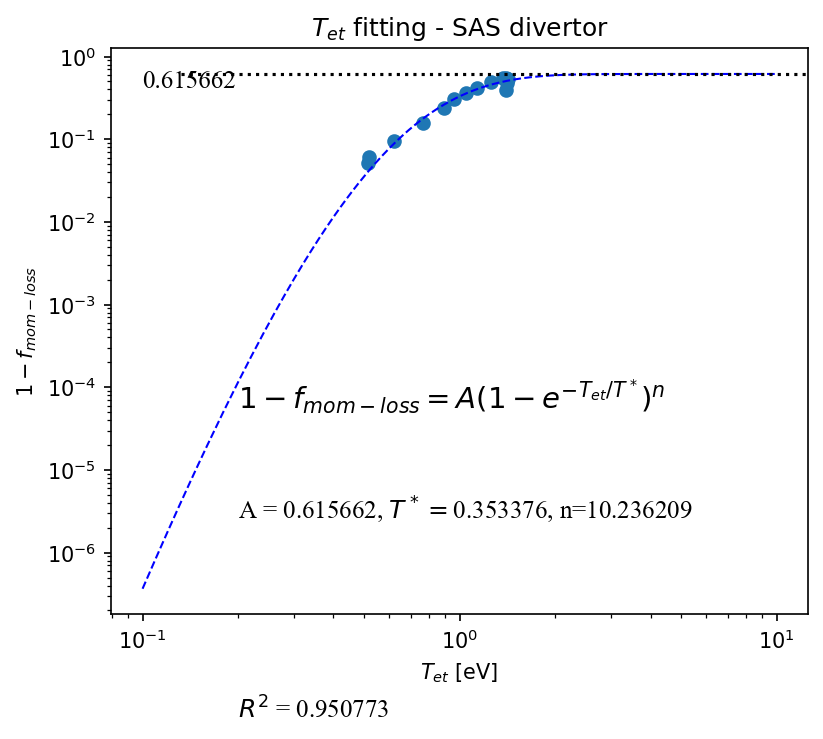

In [275]:
loss_al_8MW=[]
target_temp_al_8MW=[]
for i_al in range(21,35):
    loss_al_8MW.append(total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)[i_al,53])
    target_temp_al_8MW.append(te_b2fplasmf_al_8MW_Ne_0[i_al,96]/eV)

#x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]
x_al_8MW= np.array(target_temp_al_8MW)
y_al_8MW=np.array(loss_al_8MW)
#for i in range(len(x_al_8MW)):
#    x_al_8MW[i] = x_al_8MW[i]/eV

# curve fit
popt, _ = curve_fit(Temp_fit, x_al_8MW, y_al_8MW)

A_a8,T_a8,n_a8 = popt

x_line_al_8MW = np.arange(0.1,10, step=0.01)
# calculate the output for the range
y_line_al_8MW = Temp_fit(x_line_al_8MW, A_a8,T_a8, n_a8)

residuals = y_al_8MW-Temp_fit(x_al_8MW, A_a8,T_a8,n_a8)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_al_8MW-np.mean(y_al_8MW))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.figure(figsize=(6, 5),dpi = 150)

plt.plot(x_line_al_8MW, y_line_al_8MW, '--', color='blue', lw  = 1)
plt.title(r"$T_{et}$ fitting - SAS divertor")
plt.scatter(x_al_8MW,y_al_8MW)
plt.axhline(y=A_a8,xmin=0.1,xmax=1,linestyle=':', c = 'black')
plt.text(0.1, A_a8-0.2, r"%f" %A_a8, fontdict=font2)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$T_{et}$ [eV]")

plt.ylabel(r"$1-f_{mom-loss}$")
plt.text(0.2, 0.000055, r"$1-f_{mom-loss}=A(1-e^{-T_{et}/T^*})^n$", fontdict=font1)
plt.text(0.2, 0.0000025, r"A = %f, $T^*=$%f, n=%f" %(A_a8,T_a8,n_a8), fontdict=font2)
plt.text(0.2, 0.00000001, r"$R^2$ = %f" %r_squared, fontdict=font2)

#plt.savefig("./New_plots/8MW SAS T fitting.png")

plt.show()



/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_10933/3273254622.py:2: RuntimeWarning: invalid value encountered in power
  return A*(1- np.exp(-x*(T**(-1))))**n


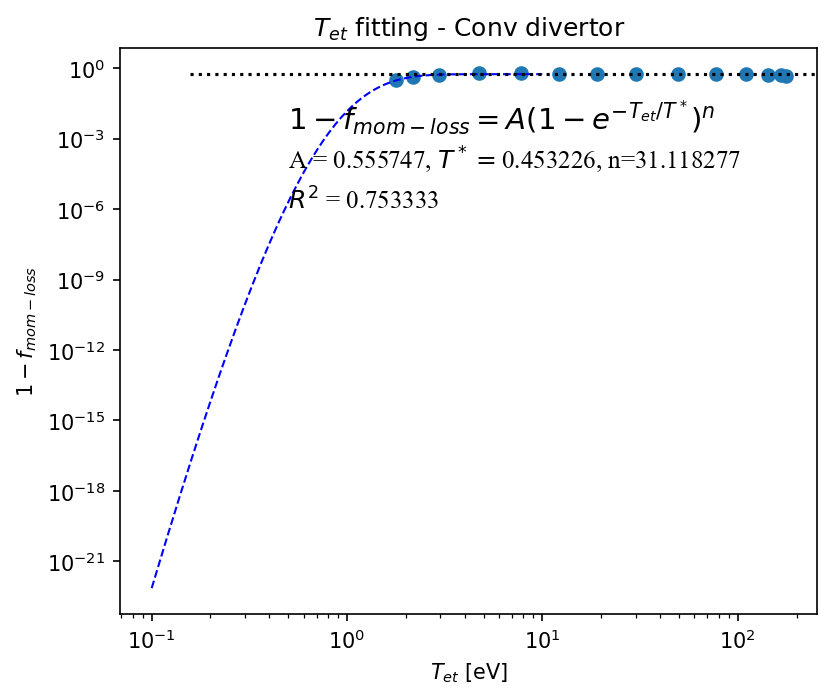

In [276]:
loss_co_8MW = []
target_temp_co_8MW = []
for i_al in range(21,35):
    loss_co_8MW.append(total_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)[i_al,53])
    target_temp_co_8MW.append(te_b2fplasmf_co_8MW_Ne_0[i_al,96]/eV)

#x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]
x_co_8MW= np.array(target_temp_co_8MW)
y_co_8MW=np.array(loss_co_8MW)
#for i in range(len(x_al_8MW)):
#    x_al_8MW[i] = x_al_8MW[i]/eV

# curve fit
popt, _ = curve_fit(Temp_fit, x_co_8MW, y_co_8MW)

A_c8,T_c8,n_c8 = popt

x_line_co_8MW = np.arange(0.1,10, step=0.01)
# calculate the output for the range
y_line_co_8MW = Temp_fit(x_line_co_8MW, A_c8,T_c8, n_c8)

residuals = y_co_8MW-Temp_fit(x_co_8MW, A_c8,T_c8,n_c8)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_co_8MW-np.mean(y_co_8MW))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.figure(figsize=(6, 5),dpi = 150)

plt.plot(x_line_co_8MW, y_line_co_8MW, '--', color='blue', lw  = 1)
plt.title(r"$T_{et}$ fitting - Conv divertor")
plt.scatter(x_co_8MW,y_co_8MW)
plt.axhline(y=A_c8,xmin=0.1,xmax=1,linestyle=':', c = 'black')
#plt.text(0.1, A_c8-0.2, r"%f" %A_c8, fontdict=font2)
plt.ylabel(r"$1-f_{mom-loss}$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$T_{et}$ [eV]")

plt.text(0.5, 0.0025, r"$1-f_{mom-loss}=A(1-e^{-T_{et}/T^*})^n$", fontdict=font1)
plt.text(0.5, 0.00005, r"A = %f, $T^*=$%f, n=%f" %(A_c8,T_c8,n_c8), fontdict=font2)
plt.text(0.5, 0.000001, r"$R^2$ = %f" %r_squared, fontdict=font2)


plt.savefig("./New_plots/8MW Conv T fitting.png")

plt.show()



In [ ]:
# for i_al in range(25,32):
#     loss_co_8MW.append(total_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)[i_al,53])
#     target_temp_co_8MW.append(te_b2fplasmf_co_8MW_Ne_0[i_al,96]/eV)

# #x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]
# x_co_8MW= np.array(target_temp_co_8MW)
# y_co_8MW=np.array(loss_co_8MW)
# #for i in range(len(x_al_8MW)):
# #    x_al_8MW[i] = x_al_8MW[i]/eV

# # curve fit
# popt, _ = curve_fit(Temp_fit, x_co_8MW, y_co_8MW)

# A_c8,T_c8,n_c8 = popt

# x_line_co_8MW = np.arange(0.1,10, step=0.01)
# # calculate the output for the range
# y_line_co_8MW = Temp_fit(x_line_co_8MW, A_c8,T_c8, n_c8)

# residuals = y_co_8MW-Temp_fit(x_co_8MW, A_c8,T_c8,n_c8)
# ss_res = np.sum(residuals**2)
# ss_tot = np.sum((y_co_8MW-np.mean(y_co_8MW))**2)
# r_squared = 1 - (ss_res / ss_tot)

# plt.figure(figsize=(6, 5),dpi = 150)

# plt.plot(x_line_co_8MW, y_line_co_8MW, '--', color='blue', lw  = 1)
# plt.title(r"$T_{et}$ fitting - Conv divertor")
# plt.scatter(x_co_8MW,y_co_8MW)
# plt.axhline(y=A_c8,xmin=0.1,xmax=1,linestyle=':', c = 'black')
# #plt.text(0.1, A_c8-0.2, r"%f" %A_c8, fontdict=font2)

# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel(r"$T_{et}$ [eV]")

# plt.ylabel(r"$1-f_{mom-loss}$")
# #plt.text(0.2, 0.55, r"$1-f_{mom-loss}=A(1-e^{-T_{et}/T^*})^n$", fontdict=font1)
# #plt.text(0.2, 0.005, r"A = %f, $T^*=$%f, n=%f" %(A_c8,T_c8,n_c8), fontdict=font2)
# #plt.text(0.2, 0.0001, r"$R^2$ = %f" %r_squared, fontdict=font2)

# #plt.savefig("./New_plots/8MW Conv T fitting.png")

# plt.show()




In [ ]:
# xf_line_al_8MW = np.arange(0.1,100, step=0.01)

# plt.figure(figsize=(6, 5),dpi = 150)

# flux_line_al_8MW = Flux_fit(xf_line_al_8MW, A_a8,T_a8, n_a8)
# plt.plot(xf_line_al_8MW, flux_line_al_8MW/np.max(flux_line_al_8MW), '--', color='blue', lw  = 1)
# plt.title(r"$\Gamma_{\parallel}$ fitting - SAS divertor")
# #target_SAS_8MW
# plt.xscale("log")
# y_flux_line_al_8MW = Flux_fit(x_line_al_8MW, A_a8,T_a8, n_a8)
# plt.scatter(x_al_8MW,target_SAS_8MW/np.max(target_SAS_8MW))

In [ ]:
#x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]

loss_co_col = []
target_temp_co_col = []

i_al = 25
loss_co_col.append(total_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)[i_al,53])
target_temp_co_col.append(te_b2fplasmf_co_8MW_Ne_0[i_al,96]/eV)
loss_co_col.append(total_pressure(ne_b2fplasmf_co_16MW_Ne_0,te_b2fplasmf_co_16MW_Ne_0,na_b2fplasmf_co_16MW_Ne_0,ti_b2fplasmf_co_16MW_Ne_0,ua_b2fplasmf_co_16MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_co_16MW_Ne_0,te_b2fplasmf_co_16MW_Ne_0,na_b2fplasmf_co_16MW_Ne_0,ti_b2fplasmf_co_16MW_Ne_0,ua_b2fplasmf_co_16MW_Ne_0)[i_al,53])
target_temp_co_col.append(te_b2fplasmf_co_16MW_Ne_0[i_al,96]/eV)
loss_co_col.append(total_pressure(ne_b2fplasmf_co_24MW_Ne_0,te_b2fplasmf_co_24MW_Ne_0,na_b2fplasmf_co_24MW_Ne_0,ti_b2fplasmf_co_24MW_Ne_0,ua_b2fplasmf_co_24MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_co_24MW_Ne_0,te_b2fplasmf_co_24MW_Ne_0,na_b2fplasmf_co_24MW_Ne_0,ti_b2fplasmf_co_24MW_Ne_0,ua_b2fplasmf_co_24MW_Ne_0)[i_al,53])
target_temp_co_col.append(te_b2fplasmf_co_24MW_Ne_0[i_al,96]/eV)
loss_co_col.append(total_pressure(ne_b2fplasmf_co_28MW_Ne_0,te_b2fplasmf_co_28MW_Ne_0,na_b2fplasmf_co_28MW_Ne_0,ti_b2fplasmf_co_28MW_Ne_0,ua_b2fplasmf_co_28MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_co_28MW_Ne_0,te_b2fplasmf_co_28MW_Ne_0,na_b2fplasmf_co_28MW_Ne_0,ti_b2fplasmf_co_28MW_Ne_0,ua_b2fplasmf_co_28MW_Ne_0)[i_al,53])
target_temp_co_col.append(te_b2fplasmf_co_28MW_Ne_0[i_al,96]/eV)
loss_co_col.append(total_pressure(ne_b2fplasmf_co_32MW_Ne_0,te_b2fplasmf_co_32MW_Ne_0,na_b2fplasmf_co_32MW_Ne_0,ti_b2fplasmf_co_32MW_Ne_0,ua_b2fplasmf_co_32MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_co_32MW_Ne_0,te_b2fplasmf_co_32MW_Ne_0,na_b2fplasmf_co_32MW_Ne_0,ti_b2fplasmf_co_32MW_Ne_0,ua_b2fplasmf_co_32MW_Ne_0)[i_al,53])
target_temp_co_col.append(te_b2fplasmf_co_32MW_Ne_0[i_al,96]/eV)



x_co_col= np.array(target_temp_co_col)
y_co_col= np.array(loss_co_col)
#for i in range(len(x_al_8MW)):
#    x_al_8MW[i] = x_al_8MW[i]/eV

# curve fit
popt, _ = curve_fit(Temp_fit, x_co_col, y_co_col)

A_cc,T_cc,n_cc = popt

residuals = y_co_col-Temp_fit(x_co_col,A_cc,T_cc,n_cc )
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_co_col-np.mean(y_co_col))**2)
r_squared = 1 - (ss_res / ss_tot)



x_line_co_8MW = np.arange(0.1,1000, step=0.1)
# calculate the output for the range
y_line_co_8MW = Temp_fit(x_line_co_8MW, A_cc,T_cc, n_cc)
# create a line plot for the mapping function
plt.figure(figsize=(6, 5),dpi = 150)

plt.plot(x_line_co_8MW, y_line_co_8MW, '--', color='blue')
plt.axhline(y=A_cc,xmin=0.1,xmax=1000,linestyle=':', c = 'black')



plt.title(r"$T_{et}$ fitting - Conventional divertor")
plt.scatter(x_co_col,y_co_col)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$T_{et}$ [eV]")

plt.ylabel(r"$1-f_{mom-loss}$")

# plt.text(0.1, A_cc+0.1, r"%f" %A_cc, fontdict=font2)

# plt.text(1, A_cc/1000, r"$1-f_{mom-loss}=A(1-e^{-T_{et}/T^*})^n$", fontdict=font1)
# plt.text(1, A_cc/10000, r"A = %f, $T^* = $ %f, n= %f" %(A_cc,T_cc,n_cc), fontdict=font2)
# plt.text(1, A_cc/100000, r"$R^2$ = %f" %r_squared, fontdict=font2)

#plt.savefig("./New_plots/8MW Conv T fitting")
plt.show()

print( A_cc,T_cc, n_cc)
print(r_squared)

In [ ]:
plt.figure(figsize=(6, 5),dpi = 150)
flux_line_co_8MW = Flux_fit(x_line_co_8MW, A_c8,T_c8, n_c8)

plt.plot(x_line_co_8MW, flux_line_co_8MW, '--', color='blue', lw  = 1)
plt.title(r"$\Gamma_{\parallel}$ fitting - Conventional divertor")
plt.xscale("log")


In [ ]:
#x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]
x_co_32MW= np.array(target_temp_co_32MW)
y_co_32MW=np.array(loss_co_32MW)
#for i in range(len(x_al_8MW)):
#    x_al_8MW[i] = x_al_8MW[i]/eV

# curve fit
popt, _ = curve_fit(Temp_fit, x_co_32MW, y_co_32MW,maxfev=10000)

A_c32,T_c32,n_c32 = popt

x_line_co_32MW = np.arange(0.1,1000, step=0.1)
# calculate the output for the range
y_line_co_32MW = Temp_fit(x_line_co_8MW, A_c32,T_c32, n_c32)
# create a line plot for the mapping function

residuals = y_co_32MW-Temp_fit(x_co_32MW,A_c32,T_c32,n_c32 )
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_co_32MW-np.mean(y_co_32MW))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.figure(figsize=(6, 5),dpi=150)

plt.plot(x_line_co_32MW, y_line_co_32MW, '--', color='blue')
plt.title(r"32MW $T_{et}$ fitting - Conventional divertor")
plt.scatter(x_co_32MW,y_co_32MW)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$T_{et}$ [eV]")

plt.ylabel(r"$1-f_{mom-loss}$")

plt.text(1, 0.1, r"$1-f_{mom-loss}=A(1-e^{-T_{et}/T^*})^n$", fontdict=font1)
plt.text(1, 0.0001, r"A = %f, $T^* = $ %f, n= %f" %(A_c32,T_c32,n_c32), fontdict=font2)
plt.text(1, 0.000001, r"$R^2$ = %f" %r_squared, fontdict=font2)

plt.savefig("./New_plots/Conv T fitting (32MW)")
plt.show()
print(pcov)


In [ ]:
plt.figure(figsize=(6, 5),dpi = 150)
flux_line_co_32MW = Flux_fit(x_line_co_32MW, A_c32,T_c32, n_c32)

plt.plot(x_line_co_32MW, flux_line_co_32MW, '--', color='blue', lw  = 1)
plt.title(r"$\Gamma_{\parallel}$ fitting - Conventional divertor")
plt.xscale("log")


In [ ]:
# #x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]
# x_co_2_5MW= target_temp_co_2_5MW
# y_co_2_5MW=loss_co_2_5MW
# #for i in range(len(x_al_8MW)):
# #    x_al_8MW[i] = x_al_8MW[i]/eV

# # curve fit
# popt, pcov = curve_fit(Temp_fit, x_co_32MW, y_co_32MW)

# A_c32,T_c32,n_c32 = popt

# x_line_co_32MW = np.arange(0.1,1000, step=0.1)
# # calculate the output for the range
# y_line_co_32MW = Temp_fit(x_line_co_8MW, A_c32,T_c32, n_c32)
# # create a line plot for the mapping function
# plt.figure(figsize=(6, 5),dpi=150)

# plt.plot(x_line_co_32MW, y_line_co_32MW, '--', color='blue')
# plt.title(r"32MW $T_{et}$ fitting - Conventional divertor")
# plt.scatter(x_co_32MW,y_co_32MW)
# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel(r"$T_{et}$ [eV]")

# plt.ylabel(r"$1-f_{mom-loss}$")

# plt.text(1, 0.1, r"$1-f_{mom-loss}=A(1-e^{-T_{et}/T^*})^n$", fontdict=font1)
# plt.text(1, 0.04, r"A = %f, $T^* = $ %f, n= %f" %(A_c32,T_c32,n_c32), fontdict=font2)
# plt.savefig("./New_plots/Conv T fitting (32MW)")
# plt.show()
# print(pcov)

In [ ]:
#x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]
x_al_32MW= np.array(target_temp_al_32MW)
y_al_32MW= np.array(loss_al_32MW)
#for i in range(len(x_al_8MW)):
#    x_al_8MW[i] = x_al_8MW[i]/eV

# curve fit
popt, pcov = curve_fit(Temp_fit, x_al_32MW, y_al_32MW)

A_a32,T_a32,n_a32 = popt

x_line_al_32MW = np.arange(0.1,10, step=0.01)
# calculate the output for the range
y_line_al_32MW = Temp_fit(x_line_al_32MW, A_a32,T_a32, n_a32)
# create a line plot for the mapping function


residuals = y_al_32MW-Temp_fit(x_al_32MW, A_a32,T_a32,n_a32)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_al_32MW-np.mean(y_al_32MW))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.figure(figsize=(6, 5), dpi=150)

plt.plot(x_line_al_32MW, y_line_al_32MW, '--', color='blue')
plt.title(r"32MW $T_{et}$ fitting - SAS divertor")
plt.scatter(x_al_32MW,y_al_32MW)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$T_{et}$ [eV]")

plt.ylabel(r"$1-f_{mom-loss}$")


plt.text(0.4, 0.001, r"$1-f_{mom-loss}=A(1-e^{-T_{et}/T^*})^n$", fontdict=font1)
plt.text(0.4, 0.0001, r"A = %f, $T^* = $ %f, n= %f" %(A_a32,T_a32,n_a32), fontdict=font2)
plt.text(0.4, 0.00001, r"$R^2$ = %f" %r_squared, fontdict=font2)

plt.savefig("./New_plots/SAS T fitting (32MW)")
plt.show()
print(pcov)

In [ ]:
# #x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]
# x_al_8MW_re, y_al_8MW_re = target_temp_al_8MW, loss_al_8MW

# # curve fit
# popt, _ = curve_fit(Temp_fit_2, x_al_8MW_re, y_al_8MW_re)

# T_a8_re,n_a8_re = popt

# x_line_al_8MW_re = np.arange(0.1,10, step=0.01)
# # calculate the output for the range
# y_line_al_8MW_re = Temp_fit_2(x_line_al_8MW_re,T_a8_re, n_a8_re)
# # create a line plot for the mapping function
# plt.figure(figsize=(6, 5), dpi=150)

# plt.plot(x_line_al_8MW_re, y_line_al_8MW_re, '--', color='blue')

# plt.scatter(x_al_8MW_re,y_al_8MW_re)
# plt.xscale("log")
# plt.yscale("log")

# plt.show()

In [ ]:
x_co_8MW_re, y_co_8MW_re = target_temp_co_8MW, loss_co_8MW

# curve fit
popt, _ = curve_fit(Temp_fit_2, x_co_8MW_re, y_co_8MW_re)

T_c8_re,n_c8_re = popt

x_line_co_8MW_re = np.arange(0.01,200, step=0.01)
# calculate the output for the range
y_line_co_8MW_re = Temp_fit_2(x_line_co_8MW_re,T_c8_re, n_c8_re)
# create a line plot for the mapping function
plt.plot(x_line_co_8MW_re, y_line_co_8MW_re, '--', color='blue')

plt.scatter(x_co_8MW_re,y_co_8MW_re)
plt.xscale("log")
plt.yscale("log")

plt.show()
print(popt)

In [ ]:
# # #x_al, y_al = [0.5101066247212611,0.550437647026052, 0.6703225602582731], [0.01999337812520763,0.04498380696981449,0.04591611475509127]
# # x_co_tot= np.concatenate([target_temp_co_8MW,target_temp_co_32MW])
# y_co_tot=np.concatenate([loss_co_8MW, loss_co_32MW])
# #for i in range(len(x_al_8MW)):
# #    x_al_8MW[i] = x_al_8MW[i]/eV

# # curve fit
# popt, pcov = curve_fit(Temp_fit, x_co_tot, y_co_tot)

# A_t,T_t,n_t = popt


# residuals = y_co_tot-Temp_fit(x_co_tot,A_t,T_t,n_t )
# ss_res = np.sum(residuals**2)
# ss_tot = np.sum((y_co_tot-np.mean(y_co_tot))**2)
# r_squared = 1 - (ss_res / ss_tot)


# x_line_al_tot= np.arange(0.1,1000, step=0.01)
# # calculate the output for the range
# y_line_al_tot = Temp_fit(x_line_al_tot, A_t,T_t, n_t)
# # create a line plot for the mapping function
# plt.figure(figsize=(6, 5), dpi=150)

# plt.plot(x_line_al_tot, y_line_al_tot, '--', color='blue')
# plt.title(r"$T_{et}$ fitting : 8MW+32MW data - Con divertor")
# plt.scatter(x_co_tot,y_co_tot)
# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel(r"$T_{et}$ [eV]")

# plt.ylabel(r"$1-f_{mom-loss}$")


# plt.text(0.4, 0.001, r"$1-f_{mom-loss}=A(1-e^{-T_{et}/T^*})^n$", fontdict=font1)
# plt.text(0.4, 0.0001, r"A = %f, $T^* = $ %f, n= %f" %(A_t,T_t,n_t), fontdict=font2)
# plt.text(0.4, 0.00001, r"$R^2$ = %f" %r_squared, fontdict=font2)

# #plt.savefig("./New_plots/SAS T fitting (32MW)")
# plt.show()
# print(pcov)

In [ ]:
x_al_32MW_re, y_al_32MW_re = target_temp_al_32MW, loss_al_32MW

# curve fit
popt, _ = curve_fit(Temp_fit_2, x_al_32MW_re, y_al_32MW_re)

T_a32_re,n_a32_re = popt

x_line_al_32MW_re = np.arange(0.1,1000, step=0.01)
# calculate the output for the range
y_line_al_32MW_re = Temp_fit_2(x_line_al_32MW_re,T_a32_re, n_a32_re)
# create a line plot for the mapping function
plt.plot(x_line_al_32MW_re, y_line_al_32MW_re, '--', color='blue')

plt.scatter(x_al_32MW_re,y_al_32MW_re)
plt.xscale("log")
plt.yscale("log")

plt.show()
print(popt)

In [ ]:

plt.title("SAS vs Con : Fitting Graph")
x_line_al_8MW_n = np.arange(0.1,10, step=0.01)
x_line_co_8MW_n = np.arange(0.1,10, step=0.01)

y_line_al_8MW_n = Temp_fit(x_line_al_8MW_n, A_a8,T_a8, n_a8)
y_line_co_8MW_n = Temp_fit(x_line_co_8MW_n, A_c8,T_c8, n_c8)

plt.plot(x_line_al_8MW_n, y_line_al_8MW_n, '-', label = 'SAS')
plt.plot(x_line_co_8MW_n, y_line_co_8MW_n, '-',label = 'Con')


plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$T_{et}$ [eV]")
plt.ylabel(r"$1-f_{mom-loss}$")

plt.legend()
#plt.savefig("./New_plots/SAS_v_Con_fitting_8MW.png")
plt.show()

In [ ]:
x_line_co_8MW_n = np.arange(0.1,1000, step=0.1)
y_line_co_8MW_n = Temp_fit(x_line_co_8MW_n, A_c8,T_c8, n_c8)

plt.plot(x_line_co_32MW, y_line_co_32MW, '--', label = '32MW')
plt.plot(x_line_co_8MW_n, y_line_co_8MW_n, '-',label = '8MW')
plt.legend()

plt.xscale("log")
plt.yscale("log")

In [ ]:
x_line_al_8MW_n = np.arange(0.1,1000, step=0.1)
y_line_al_8MW_n = Temp_fit(x_line_co_8MW_n, A_c8,T_c8, n_c8)

plt.plot(x_line_al_32MW, y_line_al_32MW, '--', label = '32MW')
plt.plot(x_line_al_8MW_n, y_line_al_8MW_n, '-',label = '8MW')
plt.legend()

plt.xscale("log")
plt.yscale("log")

In [ ]:
plt.plot(x_line_al_32MW, y_line_al_32MW, '--', label = 'SAS')
plt.plot(x_line_co_32MW, y_line_co_32MW, '--', label = 'Con')


plt.xscale("log")
plt.yscale("log")
plt.legend()

In [ ]:
plt.figure(figsize=(6, 5), dpi=150)
for i in range(15):
    a = np.sum(total_pressure( ne_b2fplasmf_co_8MW_Ne_0 ,te_b2fplasmf_co_8MW_Ne_0 ,na_b2fplasmf_co_8MW_Ne_0 ,ti_b2fplasmf_co_8MW_Ne_0 ,ua_b2fplasmf_co_8MW_Ne_0)[19+i,:96])
    plt.plot(total_pressure( ne_b2fplasmf_co_8MW_Ne_0 ,te_b2fplasmf_co_8MW_Ne_0 ,na_b2fplasmf_co_8MW_Ne_0 ,ti_b2fplasmf_co_8MW_Ne_0 ,ua_b2fplasmf_co_8MW_Ne_0)[19+i,:], label = "%f" %i)
#plt.plot(total_pressure( ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[21,:])

plt.legend()

In [ ]:
a= total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)[i_al,96]/total_pressure(ne_b2fplasmf_al_8MW_Ne_0,te_b2fplasmf_al_8MW_Ne_0,na_b2fplasmf_al_8MW_Ne_0,ti_b2fplasmf_al_8MW_Ne_0,ua_b2fplasmf_al_8MW_Ne_0)
print(np.shape(a[:, :97]))
print(target_temp_co_8MW)
print(target_temp_al_8MW)

In [ ]:
plt.figure(figsize=(6, 5), dpi=150)
for i in range(15):
    a = np.sum(total_pressure( ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[19+i,:])
    plt.plot(total_pressure( ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[19+i,:],label="%f" %i)
#plt.plot(total_pressure( ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[21,:])
plt.legend()

In [ ]:
for i in range(15):
    a = np.sum(total_pressure(ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[19+i,:])
    plt.plot(total_pressure(ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[19+i,:])
#plt.plot(total_pressure( ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[21,:])


In [ ]:
for i in range(15):
    a = np.sum(total_pressure(ne_b2fplasmf_co_32MW_Ne_0 ,te_b2fplasmf_co_32MW_Ne_0 ,na_b2fplasmf_co_32MW_Ne_0 ,ti_b2fplasmf_co_32MW_Ne_0 ,ua_b2fplasmf_co_32MW_Ne_0)[19+i,:])
    plt.plot(total_pressure(ne_b2fplasmf_co_32MW_Ne_0 ,te_b2fplasmf_co_32MW_Ne_0 ,na_b2fplasmf_co_32MW_Ne_0 ,ti_b2fplasmf_co_32MW_Ne_0 ,ua_b2fplasmf_co_32MW_Ne_0)[19+i,:])
#plt.plot(total_pressure( ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[21,:])


In [ ]:
plt.plot(total_pressure( ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[19,:97])
plt.plot(total_pressure( ne_b2fplasmf_co_32MW_Ne_0 ,te_b2fplasmf_co_32MW_Ne_0 ,na_b2fplasmf_co_32MW_Ne_0 ,ti_b2fplasmf_co_32MW_Ne_0 ,ua_b2fplasmf_co_32MW_Ne_0)[19,:97])


In [ ]:
plt.plot(total_pressure( ne_b2fplasmf_al_8MW_Ne_0 ,te_b2fplasmf_al_8MW_Ne_0 ,na_b2fplasmf_al_8MW_Ne_0 ,ti_b2fplasmf_al_8MW_Ne_0 ,ua_b2fplasmf_al_8MW_Ne_0)[19,:97])
plt.plot(total_pressure( ne_b2fplasmf_co_8MW_Ne_0 ,te_b2fplasmf_co_8MW_Ne_0 ,na_b2fplasmf_co_8MW_Ne_0 ,ti_b2fplasmf_co_8MW_Ne_0 ,ua_b2fplasmf_co_8MW_Ne_0)[19,:97])


In [ ]:

# create a line plot for the mapping function
plt.plot(x_line_al_8MW, y_line_al_8MW, '--', color='blue')

plt.scatter(x_al_8MW,y_al_8MW)
plt.xscale("log")
plt.xscale("log")

plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

plt.axes().set_aspect('equal')
rad_index = 20
plt.plot(al_new_mesh_x_cen[rad_index,:], al_new_mesh_y_cen[rad_index,:])
x = al_new_mesh_x_cen[19,77]
y = al_new_mesh_y_cen[19,77]
plt.plot(al_new_mesh_x_cen[rad_index,53:], al_new_mesh_y_cen[rad_index,53:])

#plt.plot(x, y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="white")

plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

plt.axes().set_aspect('equal')
pol_index = 50
plt.plot(al_new_mesh_x_cen[:,pol_index], al_new_mesh_y_cen[:,pol_index])
#x = al_new_mesh_x_cen[19,77]
#y = al_new_mesh_y_cen[19,77]
#plt.plot(al_new_mesh_x_cen[:,pol_index], al_new_mesh_y_cen[:,pol_index])

#plt.plot(x, y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="white")

plt.show()

In [ ]:
for i in range(18,np.shape(co_new_mesh_sep_out_midplane_dist)[0]):
    print(i, co_new_mesh_sep_out_midplane_dist[i]*1000)
    


In [ ]:
for i in range(18,np.shape(al_new_mesh_sep_out_midplane_dist)[0]):
    print(i, al_new_mesh_sep_out_midplane_dist[i]*1000)

In [ ]:



a1_ra = 20
a2_ra = 24

a1 = np.sum(total_pressure( ne_b2fplasmf_co_32MW_Ne_0 ,te_b2fplasmf_co_32MW_Ne_0 ,na_b2fplasmf_co_32MW_Ne_0 ,ti_b2fplasmf_co_32MW_Ne_0 ,ua_b2fplasmf_co_32MW_Ne_0)[a1_ra,:])
test_1 = total_pressure( ne_b2fplasmf_co_32MW_Ne_0 ,te_b2fplasmf_co_32MW_Ne_0 ,na_b2fplasmf_co_32MW_Ne_0 ,ti_b2fplasmf_co_32MW_Ne_0 ,ua_b2fplasmf_co_32MW_Ne_0)[a1_ra,:]/a1


a2 = np.sum(total_pressure( ne_b2fplasmf_co_32MW_Ne_0 ,te_b2fplasmf_co_32MW_Ne_0 ,na_b2fplasmf_co_32MW_Ne_0 ,ti_b2fplasmf_co_32MW_Ne_0 ,ua_b2fplasmf_co_32MW_Ne_0)[a2_ra,:])
test_2 = total_pressure( ne_b2fplasmf_co_32MW_Ne_0 ,te_b2fplasmf_co_32MW_Ne_0 ,na_b2fplasmf_co_32MW_Ne_0 ,ti_b2fplasmf_co_32MW_Ne_0 ,ua_b2fplasmf_co_32MW_Ne_0)[a2_ra,:]/a2


a3 = np.sum(total_pressure( ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[a2_ra,:])
test_3 = total_pressure( ne_b2fplasmf_al_32MW_Ne_0 ,te_b2fplasmf_al_32MW_Ne_0 ,na_b2fplasmf_al_32MW_Ne_0 ,ti_b2fplasmf_al_32MW_Ne_0 ,ua_b2fplasmf_al_32MW_Ne_0)[a2_ra,:]/a3




rho = np.corrcoef(x)


# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
# for i in [0,1,2]:
#     ax[i].scatter(x[0,],x[1+i,])
#     ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
#     ax[i].set(xlabel='x',ylabel='y')
# fig.subplots_adjust(wspace=.4)    


#plt.title('Correlation = ' + "{%f}".format(rho[text_1,test_2]))
plt.figure(figsize=(8, 8))

plt.axes().set_aspect('equal')
plt.scatter(test_1,test_2)
res = stats.linregress(test_1, test_2)

R3 = np.corrcoef(test_1, test_2)
plt.plot(test_1, res.intercept + res.slope*test_1, 'r', label='fitted line')
plt.show()

print(R3)
print(res.slope)

In [ ]:
plt.figure(figsize=(8, 8))

plt.axes().set_aspect('equal')
plt.scatter(test_1,test_3)
res1 = stats.linregress(test_1, test_3)

R3 = np.corrcoef(test_1, test_3)
plt.plot(test_1, res1.intercept + res1.slope*test_1, 'r', label='fitted line')
plt.show()

print(R3)
print(res1.slope)